In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kde
from matplotlib.colors import LogNorm

#settings
plt.style.use('classic')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.linewidth'] = 3.0
matplotlib.rcParams['hist.bins'] = 'auto'
matplotlib.rcParams['image.cmap'] = 'RdYlBu_r' #'hot'
#print(matplotlib.rcParams)

print("Hello world!")
inputFile="../DataFiles/ACP80_0_p1M.dat"
inFileLabel=r"0 $\mu$rad"
inputSimFile="../DataFiles/ACP80_plus50_p1M.dat"
inSimFileLabel=r"+50 $\mu$rad"
cols=["gonio_angle","d0_x","d0_y","thetaIn_x","thetaOut_x","thetaIn_y","thetaOut_y","unknown1","unknown2"]

#Common offset for ACP80 runs
gonio_zero = 1570840.0/1000. #mrad

Hello world!


In [2]:
if inputSimFile == "":
    simu = data
else :
    simu = np.genfromtxt(inputSimFile,
                         names=cols,
                         dtype=None,
                         delimiter=',')

datasetI = pd.read_csv(inputFile,header=None,names=cols)
datasetI["gonio_angle"]=datasetI["gonio_angle"]/1000.
datasetI["thetaIn_x"]=datasetI["thetaIn_x"]*1000.
datasetI["thetaOut_x"]=datasetI["thetaOut_x"]*1000.
datasetI["thetaIn_y"]=datasetI["thetaIn_y"]*1000.
datasetI["thetaOut_y"]=datasetI["thetaOut_y"]*1000.
datasetI["deltaTheta"] = datasetI["thetaOut_x"]-datasetI["thetaIn_x"]
print(datasetI.iloc[0,:])

if inputSimFile == "":
    datasetSimuI = datasetI
else :
    datasetSimuI = pd.read_csv(inputSimFile,header=None,names=cols)
    datasetSimuI["gonio_angle"]=datasetSimuI["gonio_angle"]/1000.
    datasetSimuI["thetaIn_x"]=datasetSimuI["thetaIn_x"]*1000.
    datasetSimuI["thetaOut_x"]=datasetSimuI["thetaOut_x"]*1000.
    datasetSimuI["thetaIn_y"]=datasetSimuI["thetaIn_y"]*1000.
    datasetSimuI["thetaOut_y"]=datasetSimuI["thetaOut_y"]*1000.
    datasetSimuI["deltaTheta"] = datasetSimuI["thetaOut_x"]-datasetI["thetaIn_x"]
print(datasetSimuI.iloc[0,:])

gonio_angle    1570.840000
d0_x             -3.350927
d0_y             -4.145363
thetaIn_x        -0.071660
thetaOut_x       -0.066953
thetaIn_y        -0.085815
thetaOut_y       -0.066987
unknown1          0.000000
unknown2          0.000000
deltaTheta        0.004707
Name: 0, dtype: float64
gonio_angle    1570.889900
d0_x             -0.537172
d0_y             -2.690703
thetaIn_x         0.036072
thetaOut_x        0.099224
thetaIn_y         0.033945
thetaOut_y        0.026639
unknown1          0.000000
unknown2          0.000000
deltaTheta        0.170884
Name: 0, dtype: float64


In [3]:
max_d0x = 1.
max_d0y = 2.
max_thetaInx = 0.005

#pass the initial dataset to the one you'll manipulate
dataset = datasetI

#clean from zeros
dataset = dataset[dataset.d0_x != 0.0]
dataset = dataset[dataset.d0_y != 0.0]

#apply whatever selection you need
dataset = dataset[abs(dataset.d0_x)<max_d0x]
dataset = dataset[abs(dataset.d0_y)<max_d0y]
dataset = dataset[abs(dataset.thetaIn_x)<max_thetaInx]


#pass the initial dataset to the one you'll manipulate
datasetSimu = datasetSimuI

#clean from zeros
datasetSimu = datasetSimu[datasetSimu.d0_x != 0.0]
datasetSimu = datasetSimu[datasetSimu.d0_y != 0.0]

#apply whatever selection you need
datasetSimu = datasetSimu[abs(datasetSimu.d0_x)<max_d0x]
datasetSimu = datasetSimu[abs(datasetSimu.d0_y)<max_d0y]
datasetSimu = datasetSimu[abs(datasetSimu.thetaIn_x)<max_thetaInx]


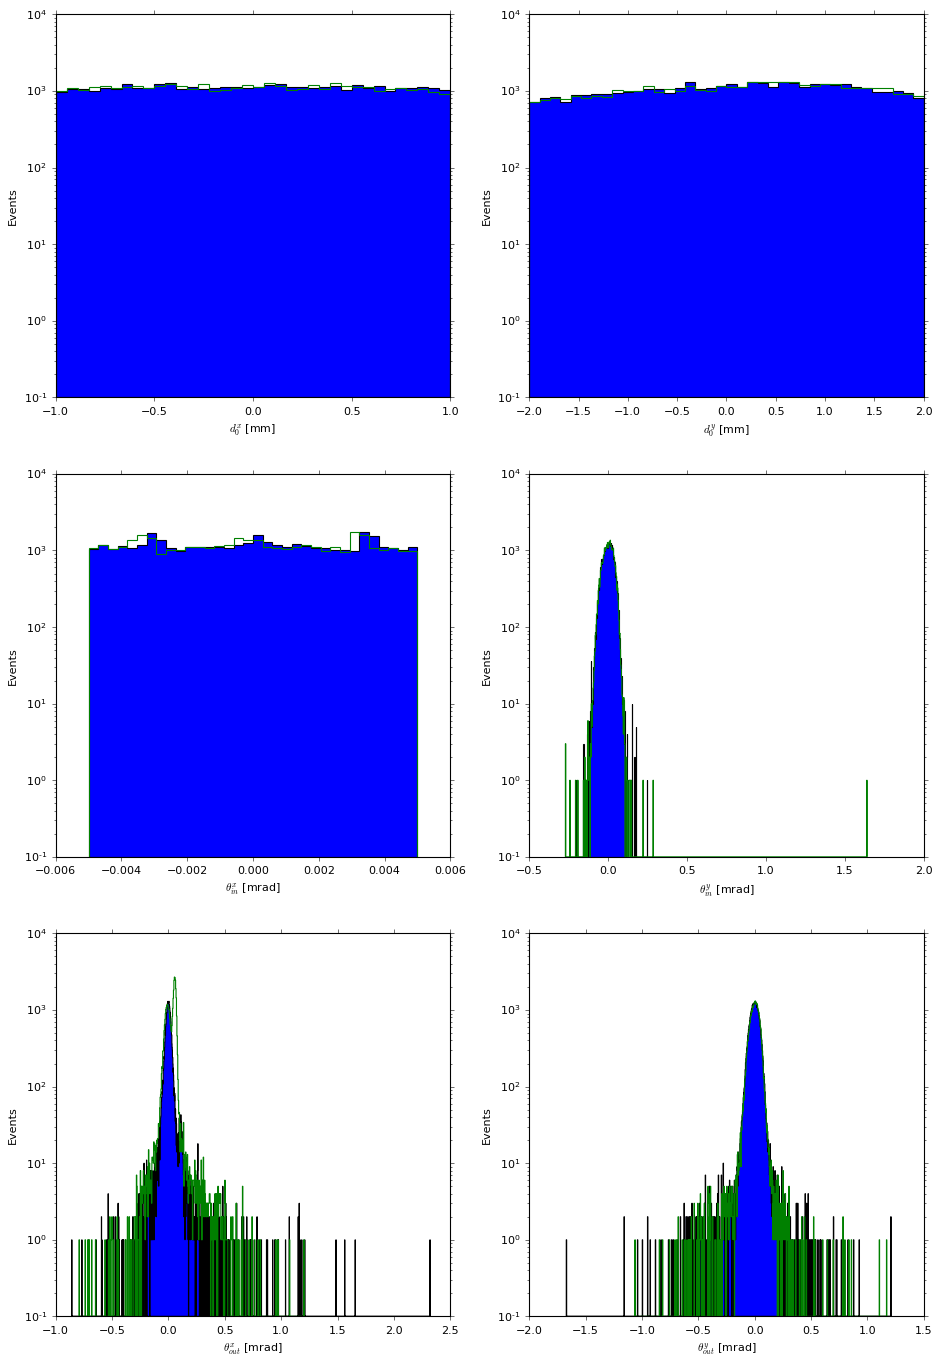

In [4]:
plt.figure(num=None, figsize=(14, 21), dpi=80, facecolor='w', edgecolor='k')

plt.subplot(3,2,1)
plt.xlabel(r"$d_0^{x}$ [mm]")
plt.ylabel("Events")
plt.hist(datasetSimu["d0_x"],log=True,histtype='stepfilled')
plt.hist(dataset["d0_x"],log=True,histtype='step', )

plt.subplot(3,2,2)
plt.xlabel(r"$d_0^{y}$ [mm]")
plt.ylabel("Events")
plt.hist(datasetSimu["d0_y"],log=True,histtype='stepfilled')
plt.hist(dataset["d0_y"],log=True,histtype='step')

plt.subplot(3,2,3)
plt.xlabel(r"$\theta_{in}^{x}$ [mrad]")
plt.ylabel("Events")
plt.hist(datasetSimu["thetaIn_x"],log=True,histtype='stepfilled')
plt.hist(dataset["thetaIn_x"],log=True,histtype='step')

plt.subplot(3,2,4)
plt.xlabel(r"$\theta_{in}^{y}$ [mrad]")
plt.ylabel("Events")
plt.hist(datasetSimu["thetaIn_y"],log=True,histtype='stepfilled')
plt.hist(dataset["thetaIn_y"],log=True,histtype='step')

plt.subplot(3,2,5)
plt.xlabel(r"$\theta_{out}^{x}$ [mrad]")
plt.ylabel("Events")
plt.hist(datasetSimu["thetaOut_x"],log=True,histtype='stepfilled')
plt.hist(dataset["thetaOut_x"],log=True,histtype='step')

plt.subplot(3,2,6)
plt.xlabel(r"$\theta_{out}^{y}$ [mrad]")
plt.ylabel("Events")
plt.hist(datasetSimu["thetaOut_y"],log=True,histtype='stepfilled')
plt.hist(dataset["thetaOut_y"],log=True,histtype='step')

plt.show()


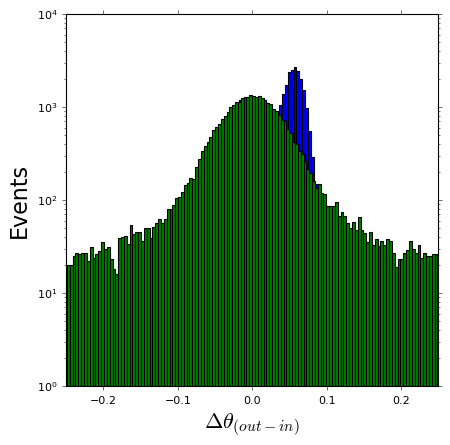

In [5]:

#plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(dataset["d0_x"],dataset["d0_y"],marker=None)
#plt.scatter(datasetSimu["d0_x"],datasetSimu["d0_y"],marker=None)
#plt.xlim(-3.5, 3.5)
#plt.ylim(-3.5, 3.5)
#plt.xlabel(r"$d_0^x$ [mm]",fontsize='20')
#plt.ylabel(r"$d_0^y$ [mm]",fontsize='20')
#plt.show()

plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(dataset["deltaTheta"],log=True)
plt.hist(datasetSimu["deltaTheta"],log=True)
plt.xlim(-0.25, 0.25)
plt.xlabel(r"$\Delta\theta_{(out-in)}$",fontsize='20')
plt.ylabel("Events",fontsize='20')
plt.show()

#plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.scatter(dataset["deltaTheta"],dataset["thetaIn_x"],marker=None)
#plt.scatter(datasetSimu["deltaTheta"],datasetSimu["thetaIn_x"],marker=None)
#plt.xlim(-0.25, 0.25)
#plt.ylim(-0.25, 0.25)
#plt.xlabel(r"$\Delta\theta_{(out-in)}$",fontsize='20')
#plt.ylabel(r"$\theta_{in}$",fontsize='20')
#plt.show()


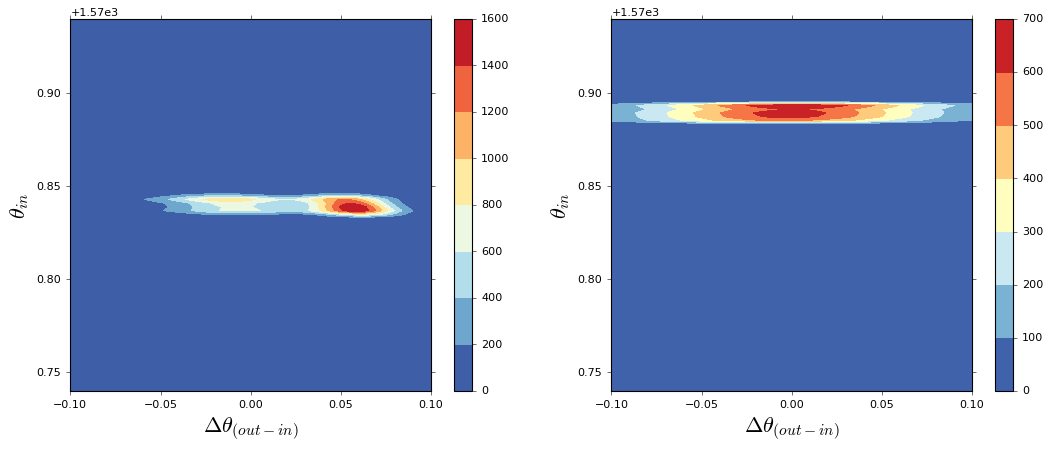

In [6]:
plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
nbins=100

plt.subplot(1,2,1)
k = kde.gaussian_kde([dataset["deltaTheta"],dataset["thetaIn_x"]+dataset["gonio_angle"]])
xi, yi = np.mgrid[-0.1:0.1:nbins*1j, (-0.1+gonio_zero):(0.1+gonio_zero):nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
plt.contourf(xi, yi, 
            zi.reshape(xi.shape)
            )
               #norm=LogNorm(1.E0,zi.max()))
plt.xlabel(r"$\Delta\theta_{(out-in)}$",fontsize='20')
plt.ylabel(r"$\theta_{in}$",fontsize='20')
plt.colorbar()

plt.subplot(1,2,2)
kS = kde.gaussian_kde([datasetSimu["deltaTheta"],datasetSimu["thetaIn_x"]+datasetSimu["gonio_angle"]])
xi, yi = np.mgrid[-0.1:0.1:nbins*1j, (-0.1+gonio_zero):(0.1+gonio_zero):nbins*1j]
zi = kS(np.vstack([xi.flatten(), yi.flatten()]))
plt.contourf(xi, yi, 
               zi.reshape(xi.shape)
            )
               #norm=LogNorm(1.E0,zi.max()))
plt.xlabel(r"$\Delta\theta_{(out-in)}$",fontsize='20')
plt.ylabel(r"$\theta_{in}$",fontsize='20')
plt.colorbar()


plt.show()

[0.02227647 3.15091209 6.04950882]


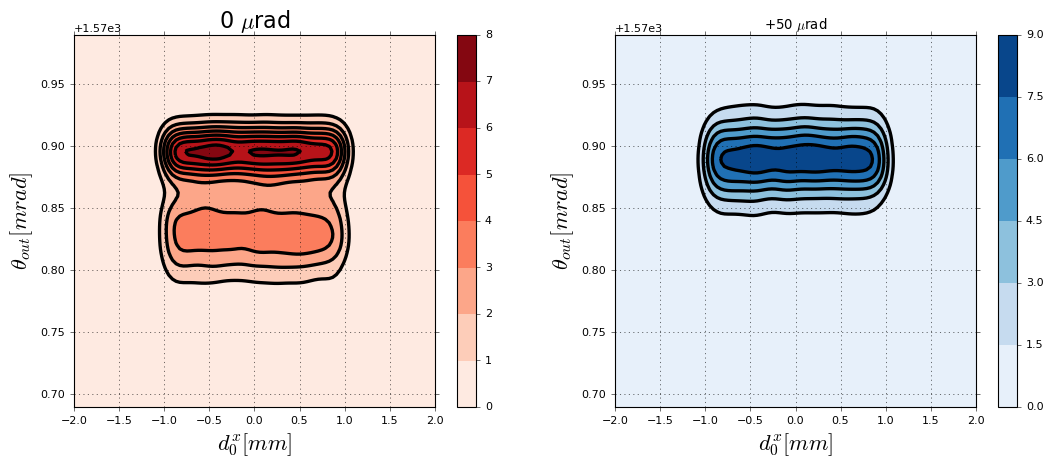

In [7]:
fig = plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w')
nbins=100

ax1 = plt.subplot(1,2,1)
plt.title(inFileLabel,fontsize=20)
x = dataset["d0_x"]
y = dataset["thetaOut_x"]+dataset["gonio_angle"]
k = kde.gaussian_kde([dataset["d0_x"],dataset["thetaOut_x"]+dataset["gonio_angle"]])
xi, yi = np.mgrid[-2.:2.:nbins*1j, (-0.15+gonio_zero):(0.15+gonio_zero):nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
CF1 = ax1.contourf(xi, yi, 
            zi.reshape(xi.shape),
            cmap='Reds'
           )
CS1 = ax1.contour(xi, yi, 
            zi.reshape(xi.shape),
            colors='k'
           )
#            norm=LogNorm(1.E0,zi.max()))
plt.xlabel(r"$d_{0}^{x} [mm]$",fontsize='20')
plt.ylabel(r"$\theta_{out} [mrad]$",fontsize='20')
plt.colorbar(CF1)
plt.grid(True)

ax2 = plt.subplot(1,2,2)
plt.title(inSimFileLabel)
x = dataset["d0_x"]
y = dataset["thetaOut_x"]+dataset["gonio_angle"]
k = kde.gaussian_kde([datasetSimu["d0_x"],datasetSimu["thetaOut_x"]+datasetSimu["gonio_angle"]])
#xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
xi, yi = np.mgrid[-2.:2.:nbins*1j, (-0.15+gonio_zero):(0.15+gonio_zero):nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
levels = stats.scoreatpercentile(zi,[50,90,95])
print(levels)
CF2 = ax2.contourf(xi, yi,
                zi.reshape(xi.shape),
                #levels,
                cmap='Blues'
                )
CS2 = ax2.contour(xi, yi,
                zi.reshape(xi.shape),
                #levels,
                colors='k'
                )
#            norm=LogNorm(1.E0,zi.max()))
#plt.clabel(CS2, inline=1, fontsize=10)
plt.xlabel(r"$d_{0}^{x} [mm]$",fontsize='20')
plt.ylabel(r"$\theta_{out} [mrad]$",fontsize='20')
plt.colorbar(CF2)
plt.grid(True)

plt.show()
fig.savefig("beams.pdf")

In [8]:
print(k)

In [9]:
from scipy import stats
stats.scoreatpercentile(zi,[32,10,5])

array([8.59533631e-06, 1.91580090e-18, 1.77674878e-22])

In [10]:
plt.savefig("beams.pdf")

<Figure size 432x288 with 0 Axes>